In [7]:
"""
1.Fetch data 取得資料
資料來源有幾種
(1).使用 sklearn.datasets 內建的資料庫 ex. load_iris()
(2).使用 sklearn.datasets 取得網路公開的資料 ex. fetch_california_housing()
(3).使用 sklearn.datasets 產生模擬資料 ex. make_classification()
(4).外部匯入csv檔或是其他格式的資料。
"""

from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
target = iris.target

# read the content
# print(iris.DESCR)
print(data.shape)
print(target.shape)


(150, 4)
(150,)


In [8]:
"""
2. Prepossessing 資料前處理
根據資料的類型，需要進行不同的處理，而最終目標是產生訓練資料與測試資料。
前處理的方式很多種，也會根據不同的訓練模型而不同。
切分資料的主流方法是Cross-validation，核心概念是將原有資料打散，再依照特定比例分成訓練資料與測試資料。
sklearn預設的比例為 訓練資料佔75%(0.75) 測試資料佔25%(0.25)

"""
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(data,target)
# x_train , x_test,y_train,y_test = train_test_split(data,target,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [9]:
"""
3.Training 訓練模型
sklearn中有各式各樣的數學模型，我們可以選定自己想要的模型來訓練，使用 fit()來進行訓練。
不同的模型則有不同的參數，也會影響到訓練的時間、資源、精準度，請參考官方文件。

"""

# create machine learning model
# training model
from sklearn import tree
clf = tree.DecisionTreeClassifier()
iris_clf = clf.fit(x_train,y_train)
print(iris_clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [10]:
"""
4.Validation 驗證模型
用測試資料評估數學模型的好壞，最簡單的方式就是比較預測資料與原始資料的結果是否相符，依照預測正確的數量來計算正確率(Accuracy)。
"""
# do the validation
y_predict = iris_clf.predict(x_test)
print("origin data:")
print(y_test)
print("predicted result")
print(y_predict)
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy(正確率) ={:8.3f}%".format(accuracy*100))

origin data:
[0 2 2 2 1 1 1 1 1 0 2 2 0 0 2 2 1 1 1 0 1 0 0 0 0 2 0 2 2 2 1 0 2 2 0 0 2
 1]
predicted result
[0 2 2 2 1 1 1 1 1 0 2 1 0 0 2 2 1 1 1 0 1 0 0 0 0 2 0 2 2 2 1 0 1 2 0 0 1
 1]
Accuracy(正確率) =  92.105%


|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.05
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.05
|   |   |   |--- sepal length (cm) <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  6.05
|   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  6.05
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



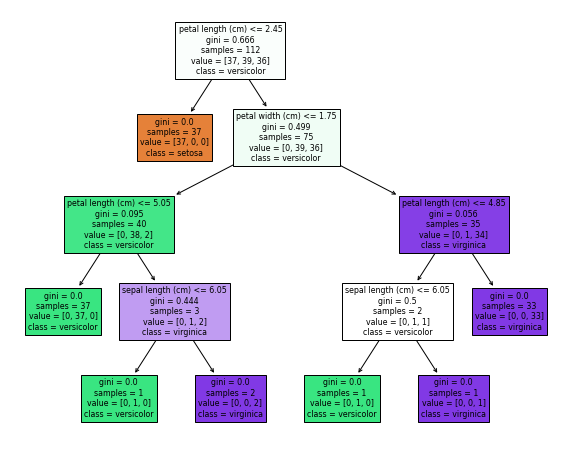

ModuleNotFoundError: No module named 'graphviz'

In [11]:
"""
5.Plotting 作圖
將計算的結果用圖示來呈現，不同的數學模型有不同的呈現方式。
ex. Decision Tree(決策樹)使用樹狀圖或是文字樹狀圖呈現, SVM使用點狀散布圖來呈現。

"""
from sklearn.tree.export import export_text
print(export_text(iris_clf,feature_names=iris.feature_names))

# plot the result
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
tree.plot_tree(iris_clf,filled=True,class_names=iris.target_names,feature_names=iris.feature_names)
plt.show()

import graphviz
dot_data = tree.export_graphviz(iris_clf, out_file=None, 
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)  
graph

In [ ]:
"""
6.Save the model. 儲存數學模型
將訓練好的模型儲存至檔案中，
"""
import pickle

filename =  "model.txt"
pickle.dump(iris_clf,open(filename,'wb'))


In [ ]:
"""
Q 如何讀取訓練好的模型?
"""
filename =  "model.sav"
ml_model = pickle.load((open(filename,'rb')))
print(ml_model)
y_predict = ml_model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy(正確率) ={:8.3f}%".format(accuracy*100))

